In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb

In [2]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Using cached jupyter_client-6.1.7-py3-none-any.whl (108 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=9e85c0dc3cefe865ab95d0dea6815daf37211043a7f6fd50fe2bc1588627e1ae
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.42.1
    Uninstalling tqdm-4.42.1:
      Successfully uninstalled tqdm-4.42.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'c:\\users\\lenovo\\anaconda3\\lib\\site-packages\\~atplotlib\\backends\\_backend_agg.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
data = pd.read_csv('home_data.csv', parse_dates=['date'])

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# add new three columns to the data representing the day , month and the year
data = data.assign(day=data.date.dt.day,
                   month=data.date.dt.month,
                   year=data.date.dt.year
                   )

In [5]:
#delete the date column
data.drop("date",axis=1,inplace=True)

In [6]:
#delete the id column
data.drop("id",axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,15.688197,6.574423,2014.322954
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,8.635063,3.115308,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,8.000000,4.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,16.000000,6.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,23.000000,9.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,31.000000,12.000000,2015.000000


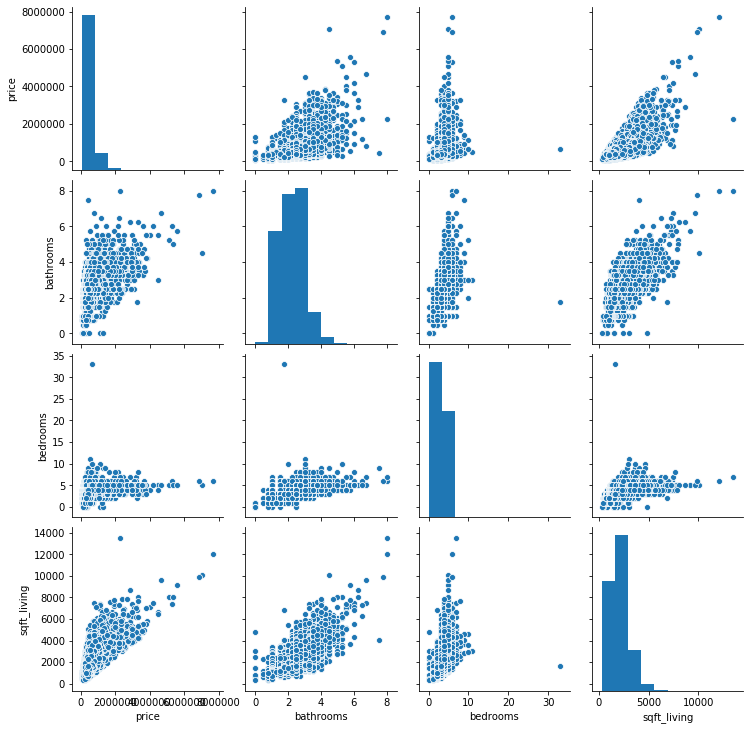

In [9]:
sns.pairplot(data[['price','bathrooms',"bedrooms","sqft_living"]])

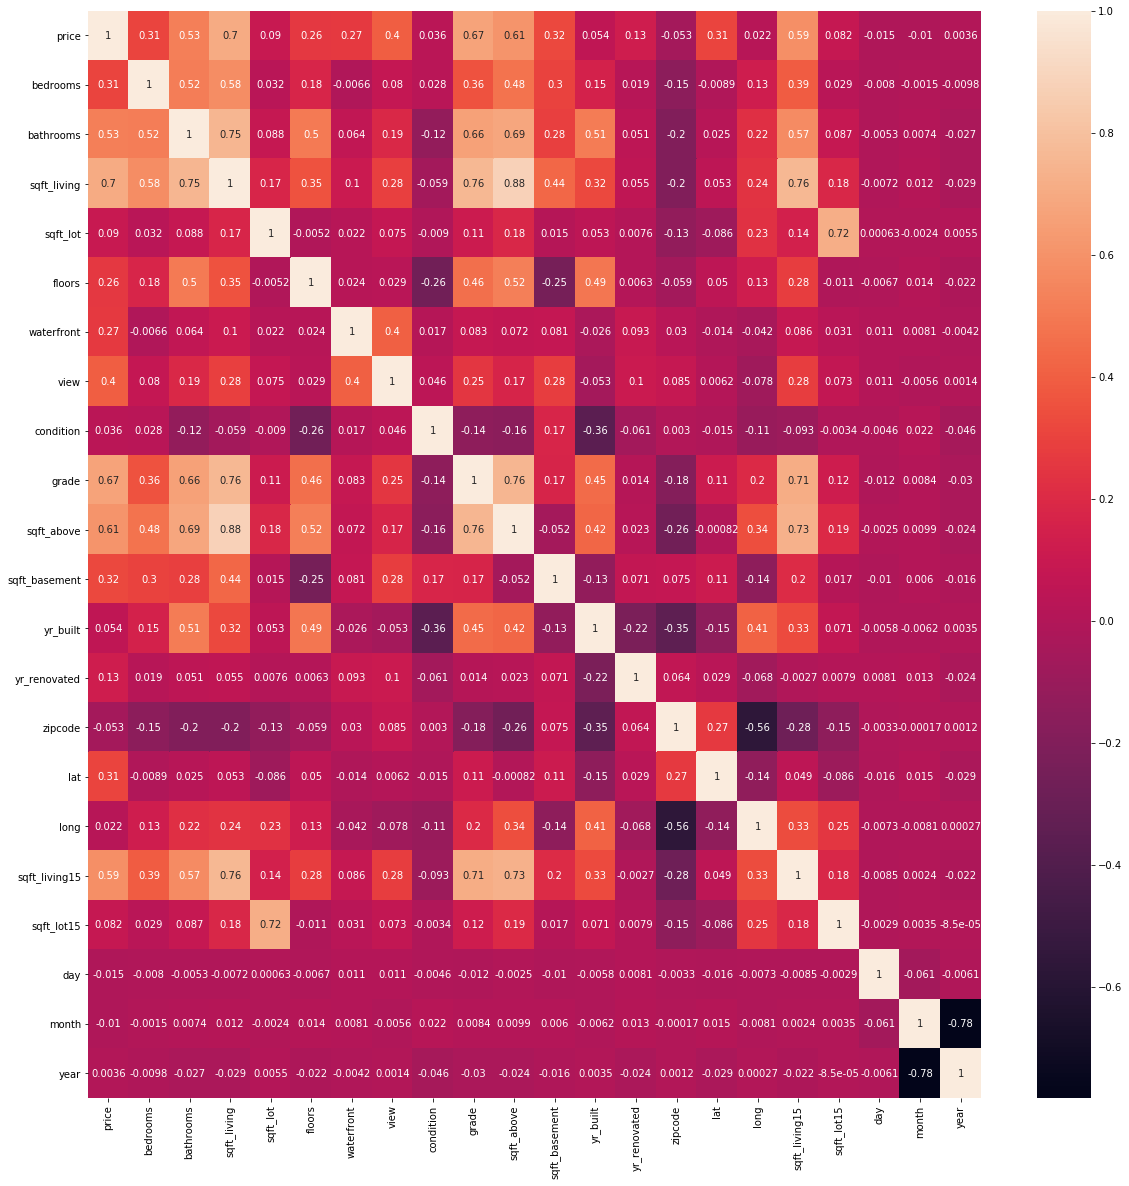

In [10]:
#check the correlation between the variables
fig, ax = plt.subplots(figsize=(20,20))
corrMatrix = data.corr()
sns.heatmap(corrMatrix,annot=True,ax=ax)
plt.show()

In [11]:
features_names = data.columns.drop('price')
features_names

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'month', 'year'],
      dtype='object')

**Separate the target variable and rest of the variables** 

In [12]:
y=data['price']
X=data[features_names]

# Let’s us understand the reason behind the good performance of XGboost !
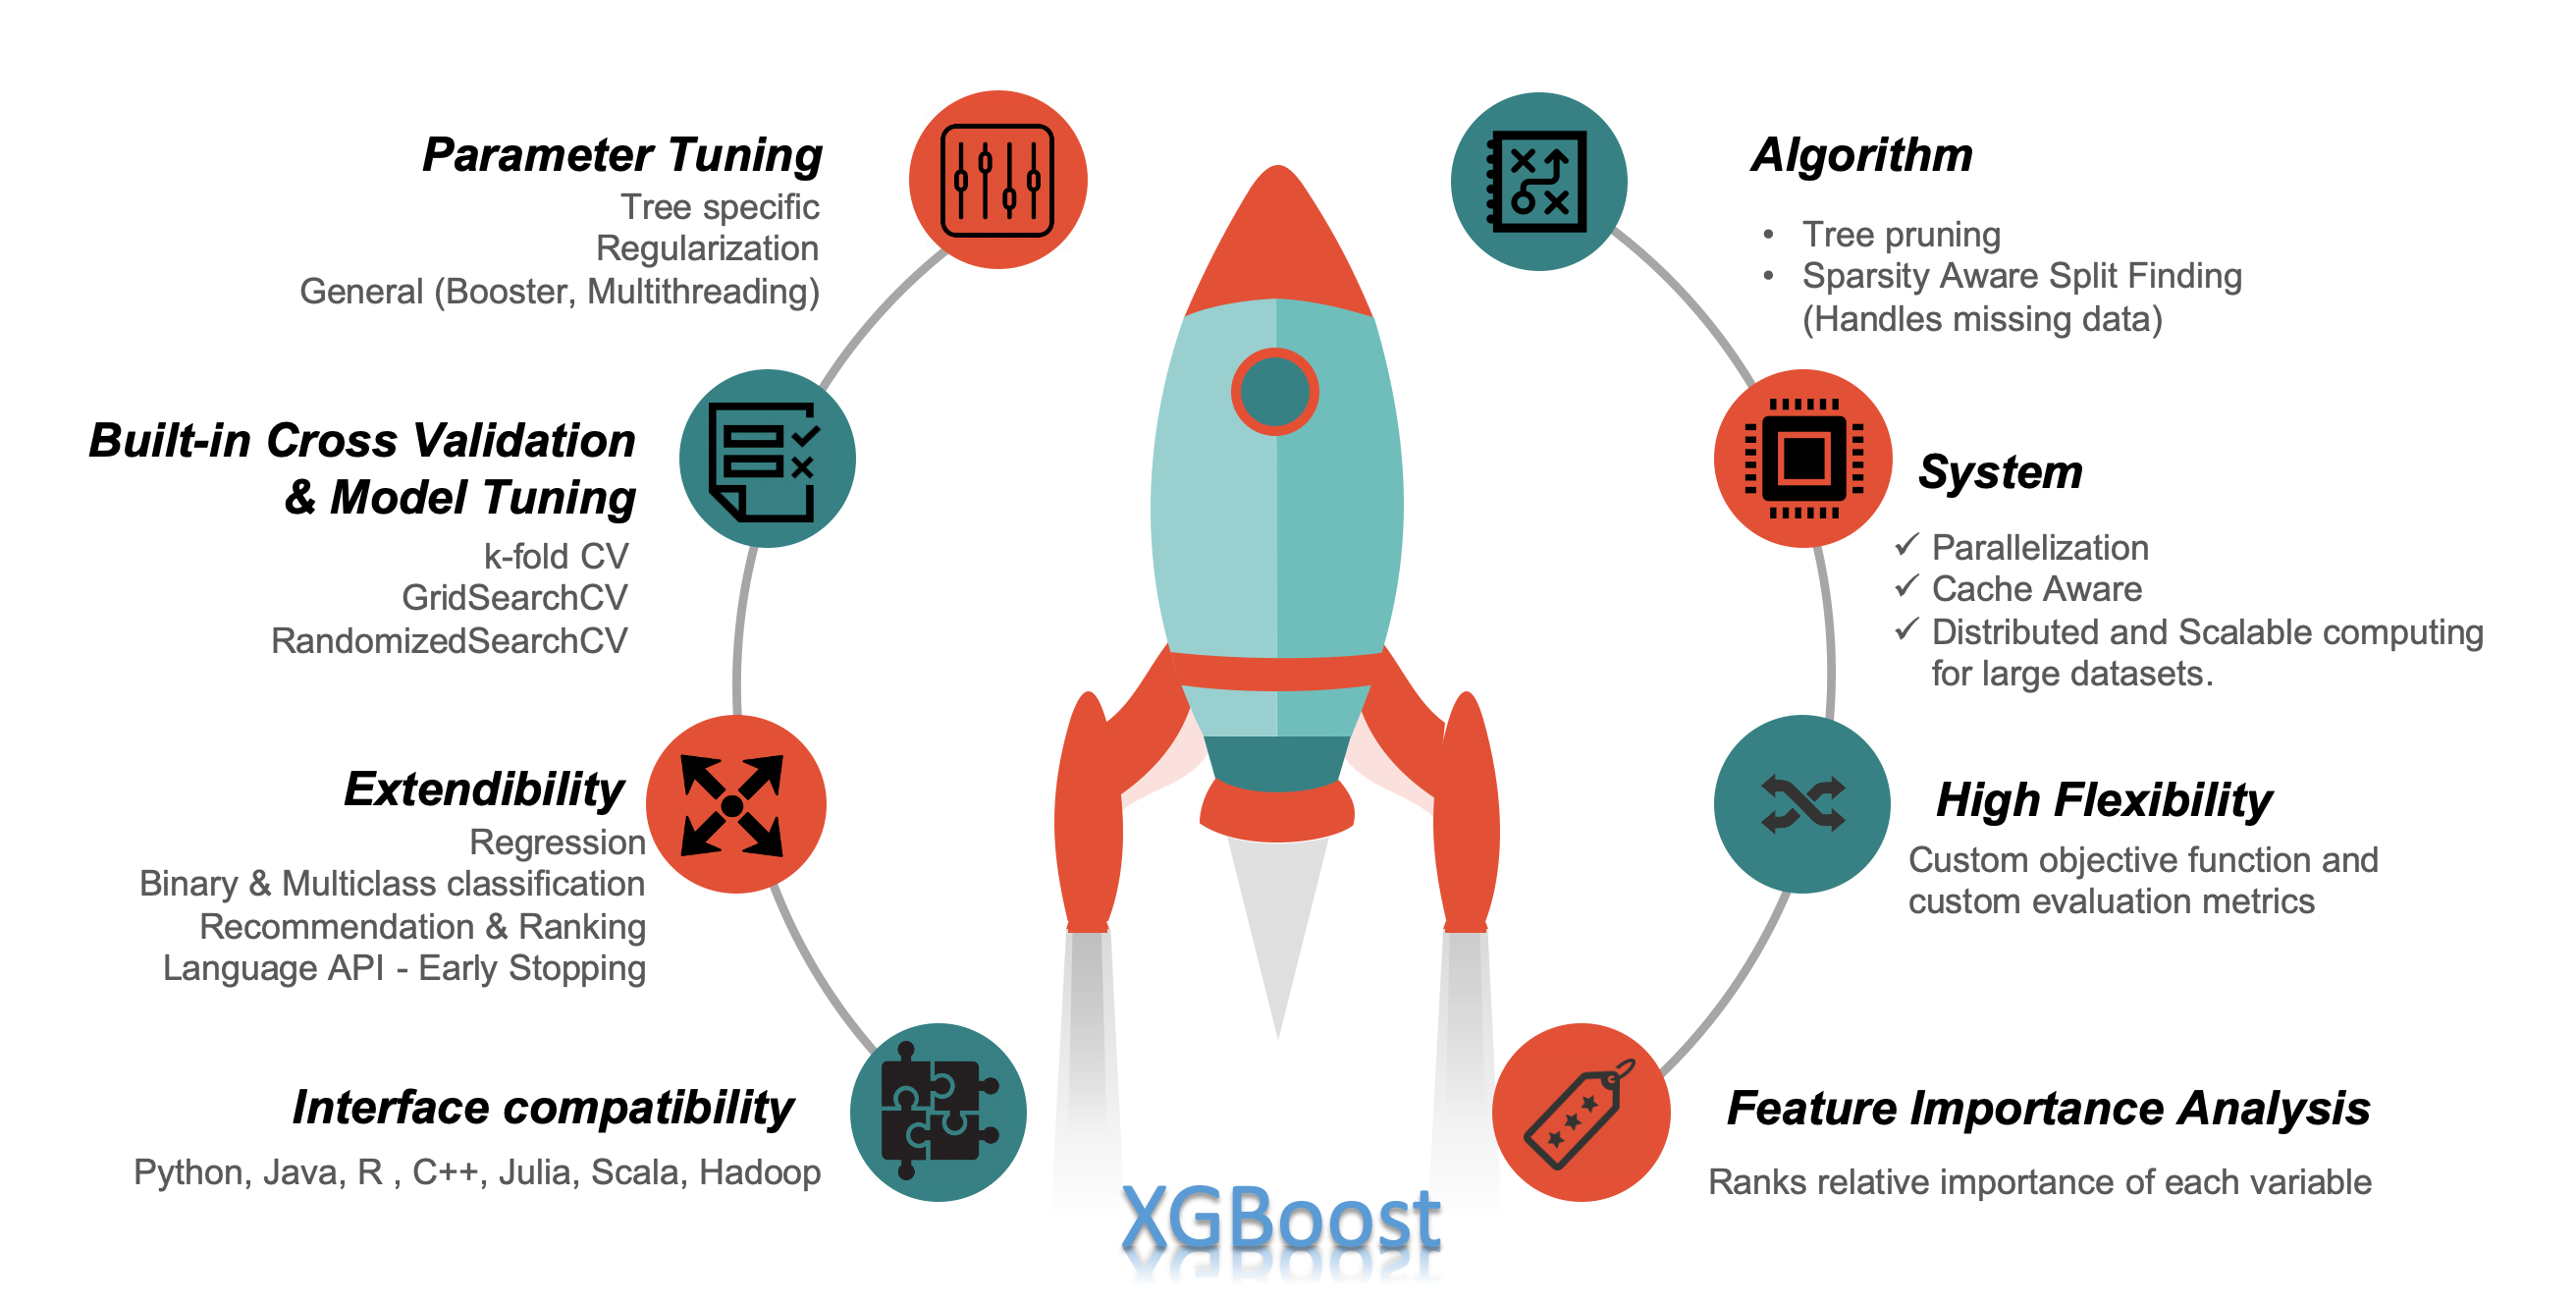

# XGBoost's hyperparameters
At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost . But the most common ones that you should know are:

* **learning_rate:** step size shrinkage used to prevent overfitting. Range is [0,1]
* **max_depth:** determines how deeply each tree is allowed to grow during any boosting round.
* **subsample:** percentage of samples used per tree. Low value can lead to underfitting.
* **colsample_bytree:** percentage of features used per tree. High value can lead to overfitting.
* **n_estimators:** number of trees you want to build.
* **objective:** determines the loss function to be used like **reg:linear** for regression problems, **reg:logistic** for classification problems with only decision, binary:logistic for classification problems with probability.
### XGBoost also supports **regularization** parameters to penalize models as they become more complex and reduce them to simple  models.

* **gamma:** controls whether a given node will split based on the expected reduction in loss after the split. A higher value  leads to fewer splits. Supported only for tree-based learners.
* **alpha:** L1 regularization on leaf weights. A large value leads to more regularization.
* **lambda:** L2 regularization on leaf weights and is smoother than L1 regularization.

Now, you will create the train and test set for cross-validation of the results using the **train_test_split** function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a **random_state** is also assigned.

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

The next step is to instantiate an XGBoost regressor object by calling the **XGBRegressor()** class from the XGBoost library with the hyper-parameters passed as arguments. 

In [14]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators=1000, random_state=1,
                          learning_rate=0.1, 
                          max_depth=100)

Fit the regressor to the training set and make predictions on the test set using the familiar **.fit()** and **.predict()** methods.

In [15]:
xgbr.fit(X_train, y_train)
preds_test = xgbr.predict(X_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=100,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

check the performance of your model using **sklearn's metrics** module.

In [17]:
from sklearn.metrics import r2_score

r2_score(y_test, preds_test)

0.8932426416326203

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds_test)
print("MSE: %.2f" % mse)

MSE: 12696040472.30


In [19]:
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 112676.71


In [20]:
print("adjusted r2: %.2f" %(1 - (1-xgbr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

adjusted r2: 0.89


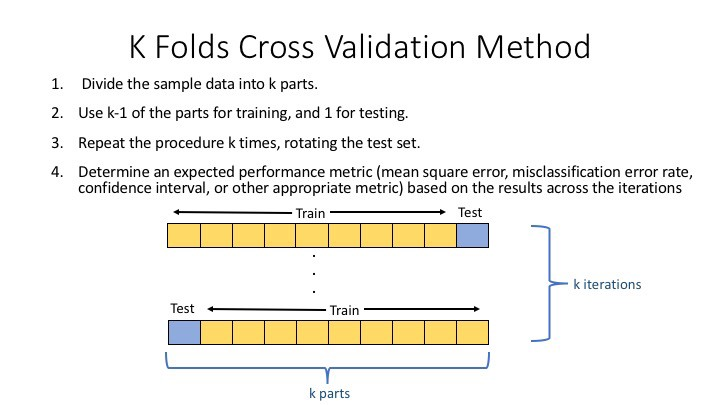

In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, X, y,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.88


# Visualize Boosting Trees and Feature Importance

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a **plot_tree()** function that makes this type of visualization easy

In [45]:
# plot the first tree

xgb.plot_tree(xgbr)
plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a **plot_importance()** function that allows you to do exactly this.

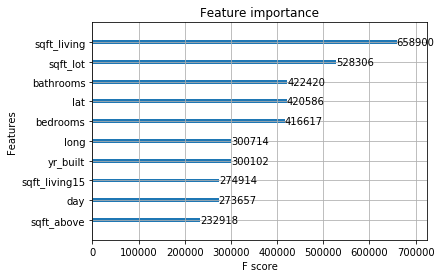

In [22]:
import xgboost as xgb
xgb.plot_importance(xgbr,max_num_features=10)# top 10 most important features

As you can see the feature **sqft_living** has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection. Isn't this brilliant?